### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("marketing_campaign.csv", header=0, sep="\t")

In [3]:
data.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

For the customer dataset, I used the 'Customer Perosnality Analysis' data from Kaggle (https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis). After loading the dataset, I did a quick check on its format -- the dataset consists of total 2240 rows and 28 columns. Most columns have zero null values (yay!), with the exception of 'Income' variable (makes sense since income data are sensitive information). Since there are considerable number of columns, I expect to spend some time on EDA and identifying meaningful variables.

In [5]:
data.describe(include='all')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240,2240,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
unique,NaN,NaN,5,8,NaN,NaN,NaN,663,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,31-08-2012,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1127,864,NaN,NaN,NaN,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5592.159821,1968.805804,NaN,NaN,52247.251354,0.444196,0.506250,NaN,49.109375,303.935714,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,NaN,NaN,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,NaN,24.000000,23.750000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,NaN,49.000000,173.500000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,NaN,NaN,68522.000000,1.000000,1.000000,NaN,74.000000,504.250000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000


### Data Preprocessing

In [6]:
# converting 'Dt_Customer' variable to datetime type
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], format="%d-%m-%Y")

In [7]:
# creating a new variable to track the # days since customer joined, with respect to the maximum joining date
max_joining_date = data["Dt_Customer"].max()
data["Days_Customer"] = max_joining_date - data["Dt_Customer"]
data["Days_Customer"] = data["Days_Customer"].dt.days.astype(int)

In [8]:
# feature engineering
# renaming column (confusing name - Response is a binary variable of whether a customer accepted the last offer)
data.rename(columns = {"Response" : "AcceptedCmp6"}, inplace = True)
# customer age as of current year 2023
data["Age"] = 2023-data["Year_Birth"] 
# total amount spent on products
data["Total_Spent"] = data["MntWines"] + data["MntFruits"] + data["MntMeatProducts"] + \
data["MntFishProducts"] + data["MntSweetProducts"] + data["MntGoldProds"]
# total number accepting offers
data["Total_Offers"] = data["AcceptedCmp1"] + data["AcceptedCmp2"] + data["AcceptedCmp3"] + data["AcceptedCmp4"] + \
data["AcceptedCmp5"] + data["AcceptedCmp6"]

In [9]:
# looking into values of categorical variables
# groupings are rather non-informative and can become more compact
print(data["Marital_Status"].value_counts(), "\n")
print(data["Education"].value_counts())

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


In [10]:
# modifying categorical variables
# Since 'Alone', 'Absurd', 'YOLO' are all singles they can be grouped together; their respective counts are also not high
data["Marital_Status"] = data["Marital_Status"].replace({"Alone":"Single","Absurd":"Single","YOLO":"Single", \
                                                         "Together":"Partner","Widow":"Widowed"})
data["Education"] = data["Education"].replace({"Graduation":"Bachelor","Basic":"Bachelor","2n Cycle":"Master"})

In [11]:
data.describe(include="all", datetime_is_numeric=True)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,AcceptedCmp6,Days_Customer,Age,Total_Spent,Total_Offers
count,2240.000000,2240.000000,2240,2240,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
unique,NaN,NaN,3,5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Bachelor,Married,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1181,864,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5592.159821,1968.805804,NaN,NaN,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,...,0.064286,0.013393,0.009375,3.0,11.0,0.149107,353.582143,54.194196,605.798214,0.446875
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000,27.000000,5.000000,0.000000
25%,2828.250000,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,180.750000,46.000000,68.750000,0.000000
50%,5458.500000,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,355.500000,53.000000,396.000000,0.000000
75%,8427.750000,1977.000000,NaN,NaN,68522.000000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,529.000000,64.000000,1045.500000,1.000000
max,11191.000000,1996.000000,NaN,NaN,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,...,1.000000,1.000000,1.000000,3.0,11.0,1.000000,699.000000,130.000000,2525.000000,5.000000


### EDA - Univariate Analysis of Categorical Variables

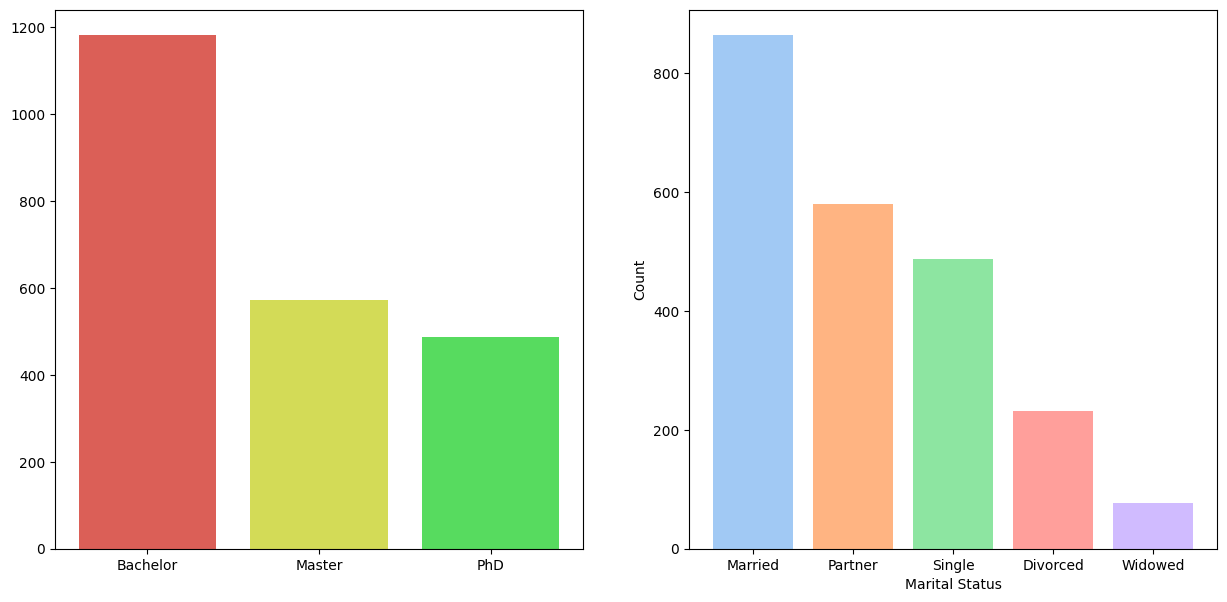

In [12]:
# Education variable 
Ed_cat = data["Education"].value_counts().index
Ed_count = data["Education"].value_counts().values
# Marital Status variable 
Mar_cat = data["Marital_Status"].value_counts().index
Mar_count = data["Marital_Status"].value_counts().values

fig, arr = plt.subplots(1, 2, figsize=(15,7))
colors1 = sns.color_palette('hls')
colors2 = sns.color_palette('pastel')

arr[0].bar(Ed_cat, Ed_count, color=colors1)
plt.xlabel("Education")
plt.ylabel("Count")

arr[1].bar(Mar_cat, Mar_count, color=colors2)
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.show()